# <span style="color:blue;">Project Overview: Resume Screening Application</span>

## <span style="color:green;">Introduction</span>
The Resume Screening Application is designed to automate the process of screening resumes using machine learning techniques. This project leverages text analysis and visualization to provide insights into the resumes collected from a RAR archive. The application aims to streamline the hiring process by identifying key skills and qualifications based on keywords.

## <span style="color:green;">Objectives</span>
- To extract resumes from a RAR file and preprocess the text for analysis.
- To perform exploratory data analysis (EDA) on the resumes to gain insights into word counts and common skills.
- To visualize data related to resume characteristics such as word count distribution and keyword presence.
- To provide a user-friendly web application using Flask for resume screening.

## <span style="color:green;">Key Features</span>
- **Resume Extraction:** Efficiently extracts PDF resumes from a RAR file.
- **Text Preprocessing:** Cleans and prepares text data for analysis.
- **Exploratory Data Analysis (EDA):** Offers visual insights into the resume data, including word counts and common keywords.
- **Keyword Analysis:** Identifies the presence of specific keywords related to skills and qualifications.
- **Web Application:** A Flask-based web interface for interacting with the resume data and visualizations.

## <span style="color:green;">Technologies Used</span>
- **Python:** The primary programming language for data processing and analysis.
- **Libraries:**
  - `PyPDF2`: For reading PDF files.
  - `scikit-learn`: For machine learning algorithms and text vectorization.
  - `Flask`: For creating the web application.
  - `Matplotlib` and `Seaborn`: For data visualization.
  - `WordCloud`: For generating word clouds from resume text.
  - `Rarfile`: For handling RAR files.

## <span style="color:green;">Project Structure</span>
1. **Library Installation**: Install necessary libraries for data manipulation, visualization, and web application development.
2. **Data Extraction**: Load resumes from the RAR file into a designated directory.
3. **Resume Inspection**: Extract text from each PDF resume and store it for analysis.
4. **Text Preprocessing**: Clean and normalize the text data for consistency.
5. **Exploratory Data Analysis (EDA)**: Analyze and visualize various characteristics of the resumes.
6. **Keyword Presence Analysis**: Assess the presence of relevant skills and keywords in the resumes.
7. **Web Application**: Implement a Flask app for user interaction with the resume data.

## <span style="color:green;">Conclusion</span>
The Resume Screening Application provides an automated approach to streamline the recruitment process by leveraging data analysis and machine learning. Through efficient text extraction and insightful visualizations, it enhances the ability to evaluate resumes based on required skills and qualifications.

## <span style="color:green;">Future Work</span>
- Implement more advanced machine learning models for better resume ranking.
- Incorporate a feedback mechanism for continuous improvement of the screening process.
- Expand keyword analysis to include synonyms and related terms for a comprehensive evaluation.

# <span style="color:blue;">Import the Required Libraries</span>

In this step, we import the necessary libraries required for our project. Each library serves a specific purpose:

- **warnings**: Used to manage warning messages during code execution, keeping the output clean.
- **rarfile**: A library for handling RAR files, allowing us to extract resume files from a compressed archive.
- **os**: A module for operating system functionalities, enabling directory and file operations.
- **numpy**: A library for numerical operations, providing support for large, multi-dimensional arrays and matrices.
- **PyPDF2**: A library to read PDF files, which is crucial for extracting text from resumes in PDF format.
- **pandas**: A powerful data manipulation library used for data analysis and handling tabular data.
- **sklearn.feature_extraction.text**: Specifically, the `TfidfVectorizer` is used for converting text to a matrix of TF-IDF features, aiding in text analysis.
- **sklearn.metrics.pairwise**: Importing `cosine_similarity` to calculate the similarity between documents based on their vectorized representation.
- **Flask**: A micro web framework for building web applications, which we will use to create a simple API for our project.
- **json**: A library for handling JSON data, useful for data interchange.
- **matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative graphics.
- **WordCloud**: A library to create word clouds, which helps visualize the most frequent words in resumes.
- **collections.Counter**: A subclass of the dictionary that helps count hashable objects, particularly useful for counting word occurrences.

By importing these libraries, we set the foundation for the subsequent steps in our project.

In [5]:
# Install necessary libraries

In [6]:
!pip install rarfile  # Install the rarfile library to handle RAR archive files

In [7]:
!pip install PyPDF2 scikit-learn Flask  # Install PyPDF2 for PDF file manipulation, scikit-learn for machine learning algorithms, and Flask for building web applications


In [8]:
!pip install matplotlib seaborn wordcloud  # This command installs Matplotlib, Seaborn, and WordCloud for creating visualizations


In [9]:
!pip install rarfile PyPDF2 scikit-learn Flask matplotlib seaborn wordcloud  # Install necessary libraries

In [10]:
# Import the Required Libraries

In [11]:
import warnings  # Import the warnings module to manage warning messages during code execution

In [12]:
import rarfile  # Import rarfile to handle RAR files

In [13]:
import os  # Import os for directory operations

In [14]:
import numpy as np  # Importing NumPy for numerical operations

In [15]:
import PyPDF2  # Import PyPDF2 to read PDF files

In [16]:
import pandas as pd  # Import pandas for data manipulation

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for text vectorization

In [18]:
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine_similarity to calculate similarity

In [19]:
from flask import Flask, request, jsonify  # Import Flask components for web app

In [20]:
import json  # Import json for handling JSON data

In [21]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [22]:
import seaborn as sns  # Import seaborn for enhanced plotting

In [23]:
from wordcloud import WordCloud  # Import WordCloud for generating word clouds

In [24]:
from collections import Counter  # Importing Counter for counting hashable objects

In [25]:
# Ignore any warnings to keep the output clean

In [26]:
warnings.filterwarnings('ignore')  # This line disables the display of warnings for cleaner output

# <span style="color:blue;">Load the RAR File Containing Resumes</span>

In this section, we define the paths for the RAR file and the extraction directory. We will extract the resumes from the RAR archive for further processing.

- **RAR_FILE_PATH**: This variable holds the path to the RAR file containing the resumes.
- **EXTRACTED_DIR**: This variable defines the directory where the extracted resumes will be stored.

The next step will involve creating a function to load the resumes from the RAR file into the specified directory.

In [27]:
# Load the RAR file containing resumes

In [28]:
RAR_FILE_PATH = '/content/Ignitus HR Resumes.rar'  # Define the path to the RAR file

In [29]:
EXTRACTED_DIR = '/content/extracted_resumes'  # Define the extraction directory

# <span style="color:blue;">Load Resumes</span>

Here, we define a function named `load_resumes` that handles the extraction of resumes from the RAR file. The function operates as follows:

- Opens the RAR file using the `rarfile` library.
- Extracts all contents to the specified extraction directory.
- Returns a list of extracted files, which will contain the resumes in PDF format.

This function is crucial for making the resumes available for further processing and analysis.

In [30]:
# Load Resumes

In [31]:
def load_resumes(rar_file_path, extract_dir):  # Function to load resumes from RAR file
    with rarfile.RarFile(rar_file_path) as rf:  # Open the RAR file
        rf.extractall(extract_dir)  # Extract all contents to the specified directory
    return os.listdir(extract_dir)  # Return the list of extracted files

In [32]:
extracted_files = load_resumes(RAR_FILE_PATH, EXTRACTED_DIR)  # Load the resumes and store in a variable

# <span style="color:blue;">Inspect the Resumes</span>

In this step, we define a function named `inspect_resumes` to read and extract text from each resume file in the extraction directory. The function performs the following tasks:

- Initializes an empty dictionary to store the resumes.
- Iterates through each file in the specified directory.
- Checks if the file is a PDF; if it is, the function opens the file and uses `PyPDF2` to read its contents.
- Extracts text from each page of the PDF, concatenating it into a single string.
- Stores the extracted text in the dictionary with the filename as the key, ensuring any extra whitespace is removed.

This function allows us to inspect the resumes' contents, which will be essential for subsequent analysis.

In [33]:
# Inspect the Resumes

In [34]:
def inspect_resumes(resume_dir):  # Function to inspect resumes in a directory
    resumes = {}  # Initialize an empty dictionary to store resumes
    for filename in os.listdir(resume_dir):  # Iterate through each file in the directory
        if filename.endswith('.pdf'):  # Check if the file is a PDF
            with open(os.path.join(resume_dir, filename), 'rb') as file:  # Open the PDF file
                reader = PyPDF2.PdfReader(file)  # Create a PDF reader object
                text = ""  # Initialize an empty string to hold the text
                for page in reader.pages:  # Iterate through each page of the PDF
                    text += page.extract_text() + " "  # Extract text and concatenate it
            resumes[filename] = text.strip()  # Store the extracted text in the dictionary, removing extra whitespace
    return resumes  # Return the dictionary of resumes

In [35]:
resumes = inspect_resumes(EXTRACTED_DIR)  # Inspect resumes and store in a variable

# <span style="color:blue;">Clean the Resumes</span>

In this section, we define a preprocessing function named `preprocess_text`. This function is responsible for cleaning and preparing the text for analysis.

- Currently, the function converts the entire text to lowercase, ensuring uniformity in text representation and facilitating accurate comparisons during analysis.

Preprocessing is a vital step that helps improve the quality of the text data we will be working with in the following stages of the project.

In [36]:
# Clean the Resumes

In [37]:
def preprocess_text(text):  # Function to preprocess text
    return text.lower()  # Convert text to lowercase for uniformity

In [38]:
# Preprocess the resumes

In [39]:
preprocessed_resumes = {name: preprocess_text(content) for name, content in resumes.items()}  # Preprocess each resume


# <span style="color:blue;">Exploratory Data Analysis (EDA)</span>

In this step, we define a function named `explore_data` to perform exploratory data analysis on the resumes. The function provides insights into the dataset by:

- Printing the total number of resumes loaded, offering a quick overview of the dataset size.
- Iterating through each resume and printing the filename along with the first 200 characters of its content. This helps in understanding the general structure and content of the resumes.

EDA is an important part of the data analysis process as it helps identify patterns, anomalies, and key characteristics of the dataset.

In [40]:
# Exploratory Data Analysis (EDA)

In [41]:
def explore_data(resumes):  # Function to explore the resumes data
    print(f"Total Resumes Loaded: {len(resumes)}")  # Print the total number of resumes
    for resume_name, content in resumes.items():  # Iterate through each resume
        print(f"\nResume: {resume_name}")  # Print the resume name
        print(content[:200])  # Print first 200 characters of each resume

In [42]:
explore_data(resumes)  # Call the function to explore the data

Total Resumes Loaded: 18

Resume: metadata-scientist-resume-example.pdf
Justine Hendrickson
Metadata Scientist
Data Science graduate with a passion for data integrity, visualization, and
statistics. I’m excited to apply my passion for data science to the collaborative
eff

Resume: entry-level-data-scientist-resume-example.pdf
Trish Mathers
Entry-Level Data Scientist
Innovative and scientiﬁcally rigorous graduate with signiﬁcant data science
internship experience to bring to the table. With a team-oriented attitude,
I'm eag

Resume: data-scientist-analytics-resume-example.pdf
C O N T A C T
Barrett@email.com
(123) 456-7890
Oakland, CA
LinkedIn
GitHub
E D U C A T I O N
B.S.
Computer Science
University of California,
Berkeley
September 2014 - June 2018
Berkeley, CA
GPA: 3.8
S

Resume: data-science-manager-resume-example.pdf
K A L E B S A X T O N
D a t a  S c i e n c e  M a n a g e r
ksaxton@email.com
(123) 456-7890
Houston, TX
LinkedIn
E D U C A T I O N
B.S.
Mathematics and Economics
Rice 

In [43]:
# Resume Word Count Distribution

In [44]:
def plot_word_count_distribution(resumes):  # Defining a function to plot word count distribution
    word_counts = [len(content.split()) for content in resumes.values()]  # Counting words in each resume
    plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
    sns.histplot(word_counts, bins=30, kde=True)  # Creating a histogram with kernel density estimation
    plt.title('Resume Word Count Distribution')  # Setting the title of the plot
    plt.xlabel('Number of Words')  # Labeling the x-axis
    plt.ylabel('Frequency')  # Labeling the y-axis
    plt.show()  # Displaying the plot

In [45]:
# Call the function to plot Resume Word Count Distribution

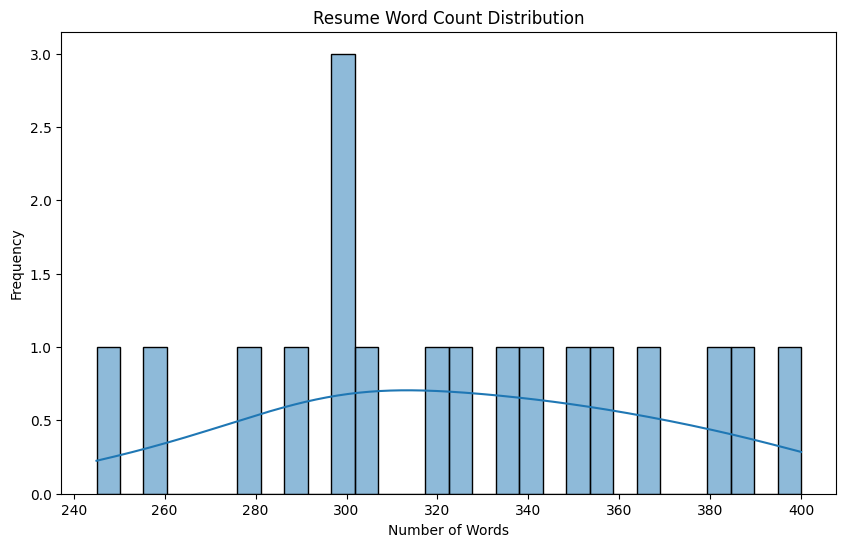

In [46]:
plot_word_count_distribution(resumes)  # Executing the function with resumes data

In [47]:
# Unique Words per Resume

In [48]:
def plot_unique_words_per_resume(resumes):  # Defining a function to plot unique words per resume
    unique_word_counts = [len(set(content.split())) for content in resumes.values()]  # Counting unique words
    plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
    sns.histplot(unique_word_counts, bins=30, kde=True)  # Creating a histogram with kernel density estimation
    plt.title('Unique Words per Resume')  # Setting the title of the plot
    plt.xlabel('Number of Unique Words')  # Labeling the x-axis
    plt.ylabel('Frequency')  # Labeling the y-axis
    plt.show()  # Displaying the plot

In [49]:
# Call the function to plot unique words per resume

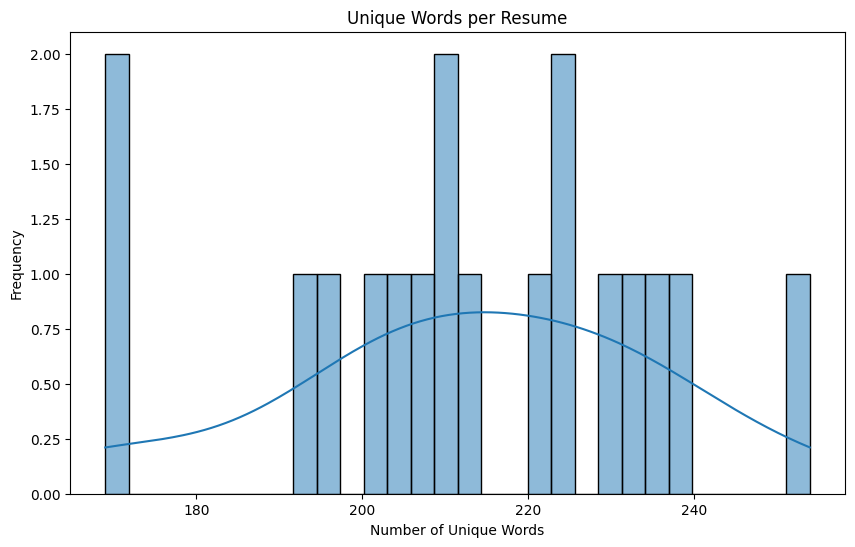

In [50]:
plot_unique_words_per_resume(resumes)  # Executing the function with resumes data

In [51]:
# Most Common N-grams

In [52]:
def plot_most_common_ngrams(resumes, n=2):  # Defining a function to plot the most common n-grams
    all_text = ' '.join(resumes.values())  # Combining all resume texts into a single string
    words = all_text.split()  # Splitting the combined text into words
    ngrams = zip(*[words[i:] for i in range(n)])  # Creating n-grams using zip
    ngram_counts = Counter(ngrams).most_common(10)  # Getting the 10 most common n-grams
    ngram_labels = [' '.join(ngram) for ngram, _ in ngram_counts]  # Creating labels for n-grams
    ngram_values = [count for _, count in ngram_counts]  # Extracting the counts of n-grams

    plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
    sns.barplot(x=ngram_labels, y=ngram_values)  # Creating a bar plot for n-grams
    plt.title(f'Top 10 Most Common {n}-grams in Resumes')  # Setting the title of the plot
    plt.xlabel(f'{n}-grams')  # Labeling the x-axis
    plt.ylabel('Frequency')  # Labeling the y-axis
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.show()  # Displaying the plot

In [53]:
# Call the function to plot most common bigrams

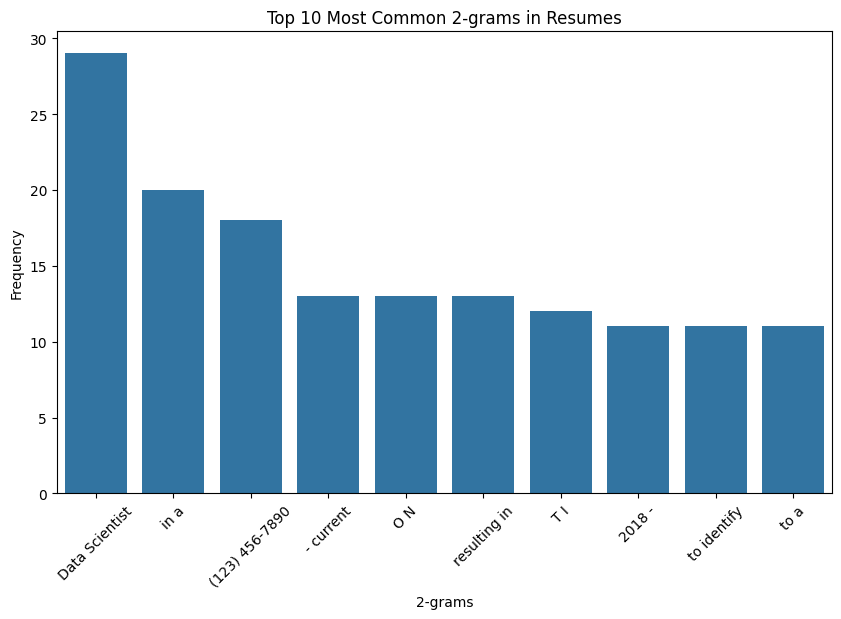

In [54]:
plot_most_common_ngrams(resumes, n=2)  # Executing the function for bigrams

In [55]:
# Call the function to plot most common trigrams

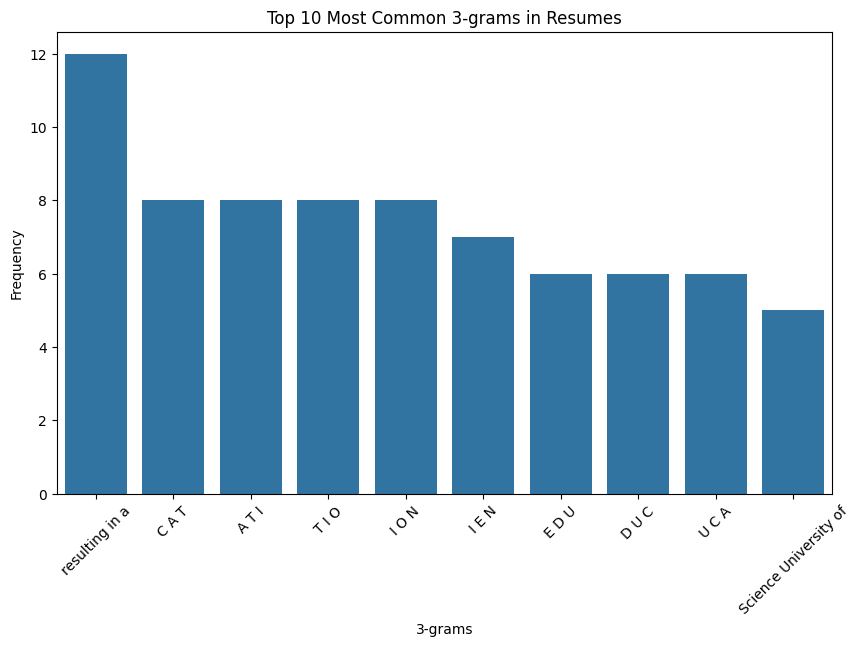

In [56]:
plot_most_common_ngrams(resumes, n=3)  # Executing the function for trigrams

In [57]:
# Length of Resumes by Year (if you have year information)

In [58]:
def plot_length_by_year(resumes_with_years):  # Defining a function to plot resume length by year
    years = [resume['year'] for resume in resumes_with_years]  # Extracting years from resumes
    lengths = [len(resume['content'].split()) for resume in resumes_with_years]  # Counting words in resumes

    df = pd.DataFrame({'Year': years, 'Length': lengths})  # Creating a DataFrame for years and lengths
    plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
    sns.boxplot(x='Year', y='Length', data=df)  # Creating a box plot for resume lengths by year
    plt.title('Resume Length by Year')  # Setting the title of the plot
    plt.xlabel('Year')  # Labeling the x-axis
    plt.ylabel('Resume Length')  # Labeling the y-axis
    plt.show()  # Displaying the plot

In [59]:
# Call the function to plot length by year

In [60]:
#plot_length_by_year(resumes_with_years)  # Uncomment this line to execute the function for year data

In [61]:
# Keyword Presence Analysis

In [62]:
def plot_keyword_presence(resumes, keywords):  # Defining a function to plot keyword presence in resumes
    presence = {keyword: sum(keyword in content for content in resumes.values()) for keyword in keywords}  # Counting presence of keywords
    plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
    sns.barplot(x=list(presence.keys()), y=list(presence.values()))  # Creating a bar plot for keyword presence
    plt.title('Keyword Presence in Resumes')  # Setting the title of the plot
    plt.xlabel('Keywords')  # Labeling the x-axis
    plt.ylabel('Count of Resumes Containing Keyword')  # Labeling the y-axis
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.show()  # Displaying the plot

In [63]:
# Example keywords to analyze

In [64]:
keywords = ['Python', 'Java', 'Machine Learning', 'Data Science', 'Project Management']  # Defining keywords for analysis


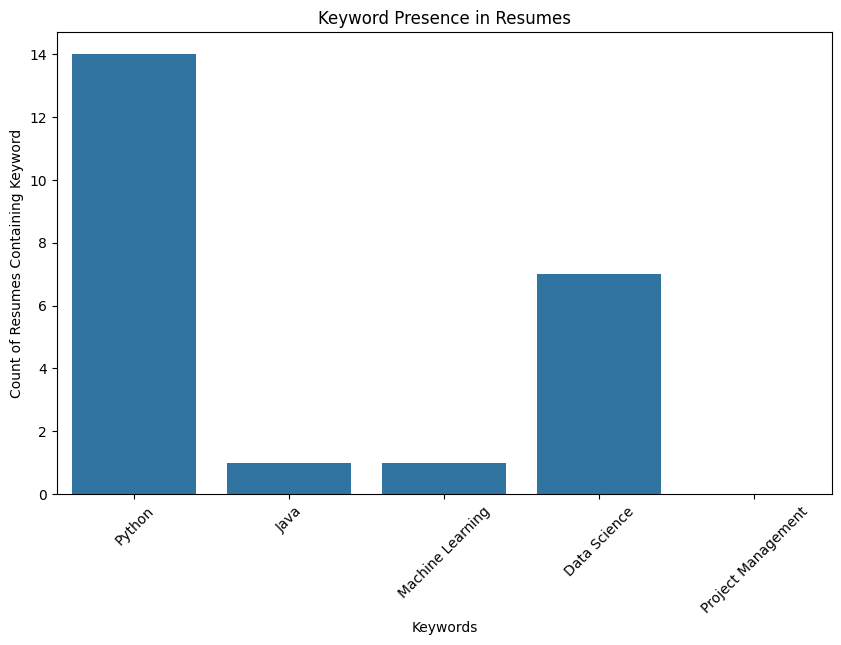

In [65]:
plot_keyword_presence(resumes, keywords)  # Executing the function with resumes data and keywords

In [66]:
# Visualizing Resume Lengths

In [67]:
def plot_resume_lengths(resumes):  # Function to plot the lengths of resumes
    lengths = [len(content.split()) for content in resumes.values()]  # Calculate the word count for each resume
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.histplot(lengths, bins=20, kde=True)  # Plot the distribution of resume lengths
    plt.title('Distribution of Resume Lengths')  # Set the title of the plot
    plt.xlabel('Number of Words')  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.show()  # Display the plot

In [68]:
# Call the function to plot resume lengths

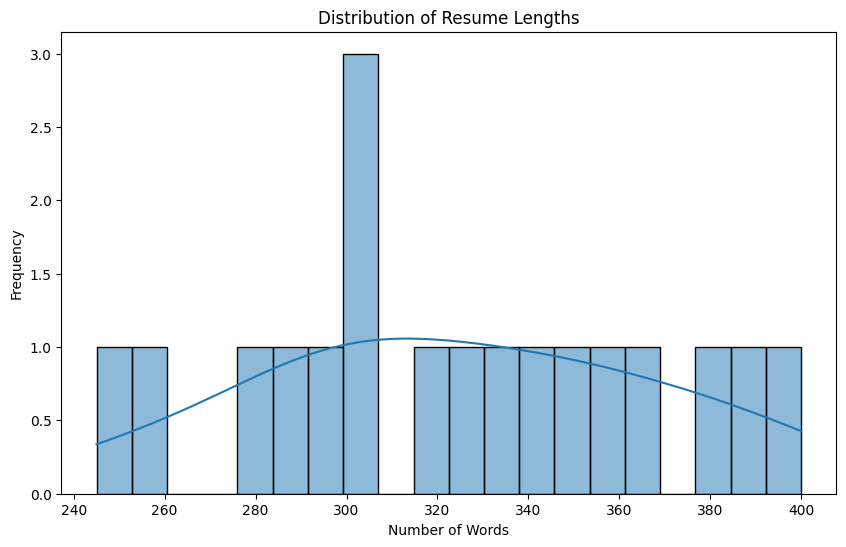

In [69]:
plot_resume_lengths(resumes)  # Call the function to visualize resume lengths

In [70]:
# Top Keywords

In [71]:
def plot_top_keywords(resumes):  # Function to plot the top keywords in resumes
    all_text = ' '.join(resumes.values())  # Join all resume texts into a single string
    words = all_text.split()  # Split the text into individual words
    word_counts = pd.Series(words).value_counts().nlargest(10)  # Count and get the top 10 most common words

    plt.figure(figsize=(10, 6))  # Set the figure size
    word_counts.plot(kind='bar')  # Plot the top keywords as a bar chart
    plt.title('Top 10 Keywords in Resumes')  # Set the title of the plot
    plt.xlabel('Keywords')  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()  # Display the plot

In [72]:
# Call the function to plot top keywords

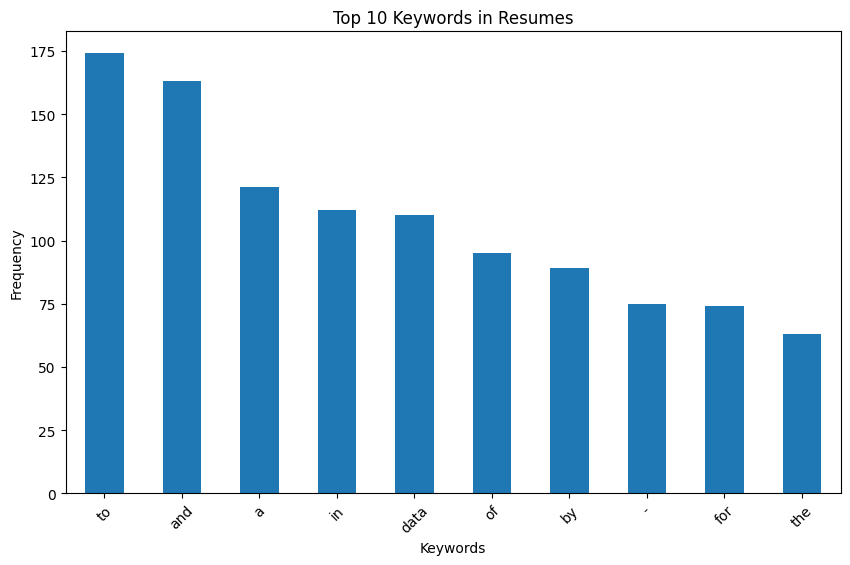

In [73]:
plot_top_keywords(resumes)  # Call the function to visualize top keywords

# <span style="color:blue;">Cosine Similarity Calculation</span>

## Overview
Cosine similarity is a metric used to measure how similar two vectors are. In the context of resume screening, the vectors represent the numerical encoding of text, such as resumes and job descriptions. By calculating the cosine similarity, we quantify how close the resume is to the job description based on their content.

## Purpose
- To compare the resume text with the job description text.
- Measures the angular distance between two vectors in a multi-dimensional space.
- A higher cosine similarity score indicates higher relevance of the resume to the job description.

## Steps
1. **Vectorization of Text Data**: Convert the textual data (resumes and job descriptions) into numerical vectors using techniques such as TF-IDF.
2. **Cosine Similarity Calculation**: Using the cosine formula, calculate the cosine of the angle between the two vectors:
   \[
   \text{Cosine Similarity} = \frac{A \cdot B}{||A|| \times ||B||}
   \]
   where `A` and `B` are the vector representations of the texts.
3. **Interpretation**: A value close to 1 indicates a high similarity, while a value close to 0 indicates no similarity.

In [74]:
# Cosine Similarity Calculation

In [75]:
vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer

In [76]:
tfidf_matrix = vectorizer.fit_transform(preprocessed_resumes.values())  # Fit and transform the preprocessed resumes


In [77]:
cosine_sim = cosine_similarity(tfidf_matrix)  # Calculate cosine similarity between the resumes

In [78]:
# Create a DataFrame for Resumes and Similarity

In [79]:
similarity_df = pd.DataFrame(cosine_sim, index=preprocessed_resumes.keys(), columns=preprocessed_resumes.keys())  # Create a DataFrame for similarity scores


# <span style="color:blue;">Model Evaluation</span>

## Overview
Model evaluation involves assessing the performance of the automated resume screening system. Key metrics are used to understand how well the model is working and whether it can generalize to unseen data.

## Purpose
- To determine how well the model can screen resumes based on predefined criteria.
- Provides a quantitative measure of the system's accuracy, precision, recall, and F1 score.

## Metrics
1. **Accuracy**: Measures the overall correctness of the model's predictions.
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   \]
2. **Precision**: Focuses on how many of the predicted relevant resumes are truly relevant.
   \[
   \text{Precision} = \frac{TP}{TP + FP}
   \]
3. **Recall**: Measures how many relevant resumes are correctly identified.
   \[
   \text{Recall} = \frac{TP}{TP + FN}
   \]
4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
   \[
   \text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}
   \]
   
## Cross-validation
- **Purpose**: To ensure the model generalizes well to new resumes and job descriptions by splitting the dataset into training and testing subsets.
- **K-Fold Cross-validation**: Divides the dataset into `k` parts and iteratively trains and tests the model on different subsets to average the performance.

In [80]:
# Evaluate - Display Similarities

In [81]:
def evaluate_similarity(similarity_df):  # Function to evaluate and display similarity scores
    print("\nCosine Similarity Matrix:")  # Print heading
    print(similarity_df)  # Display the cosine similarity matrix

In [82]:
evaluate_similarity(similarity_df)  # Call the function to evaluate similarities


Cosine Similarity Matrix:
                                                    metadata-scientist-resume-example.pdf  \
metadata-scientist-resume-example.pdf                                            1.000000   
entry-level-data-scientist-resume-example.pdf                                    0.239556   
data-scientist-analytics-resume-example.pdf                                      0.315397   
data-science-manager-resume-example.pdf                                          0.386339   
healthcare-data-scientist-resume-example.pdf                                     0.186555   
educational-data-scientist-resume-example.pdf                                    0.251763   
data-scientist-intern-resume-example.pdf                                         0.160237   
amazon-data-science-resume-example.pdf                                           0.224899   
python-data-scientist-resume-example.pdf                                         0.215120   
data-scientist-resume-example.pdf          

In [83]:
# Word Cloud

In [84]:
def plot_word_cloud(resumes):  # Function to create a word cloud from resumes
    all_text = ' '.join(resumes.values())  # Join all resume texts into a single string
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)  # Generate a word cloud

    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
    plt.axis('off')  # Hide the axis
    plt.title('Word Cloud of Resumes')  # Set the title of the plot
    plt.show()  # Display the plot

In [85]:
# Call the function to plot word cloud

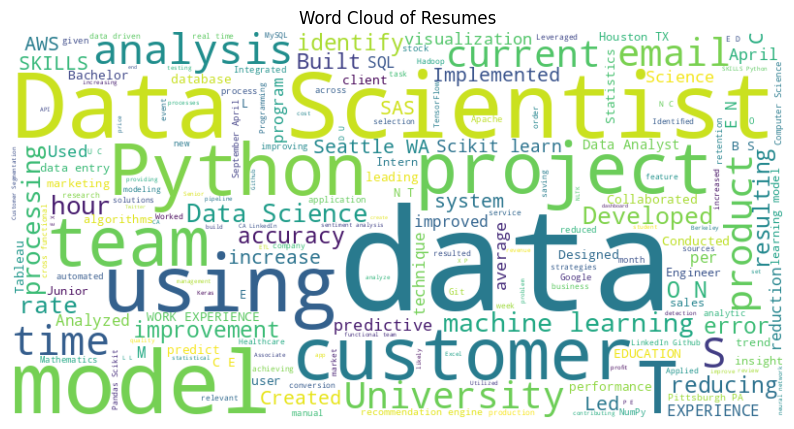

In [86]:
plot_word_cloud(resumes)  # Call the function to visualize the word cloud

In [87]:
# Cosine Similarity Heatmap

In [88]:
def plot_similarity_heatmap(similarity_df):  # Define a function to plot a heatmap of cosine similarity
    plt.figure(figsize=(12, 8))  # Create a new figure for the plot with specified dimensions
    sns.heatmap(similarity_df, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)  # Plot the heatmap with annotations
    plt.title('Cosine Similarity Heatmap')  # Set the title of the plot
    plt.xlabel('Resumes')  # Set the x-axis label
    plt.ylabel('Resumes')  # Set the y-axis label
    plt.show()  # Display the plot

In [89]:
# Call the function to plot similarity heatmap

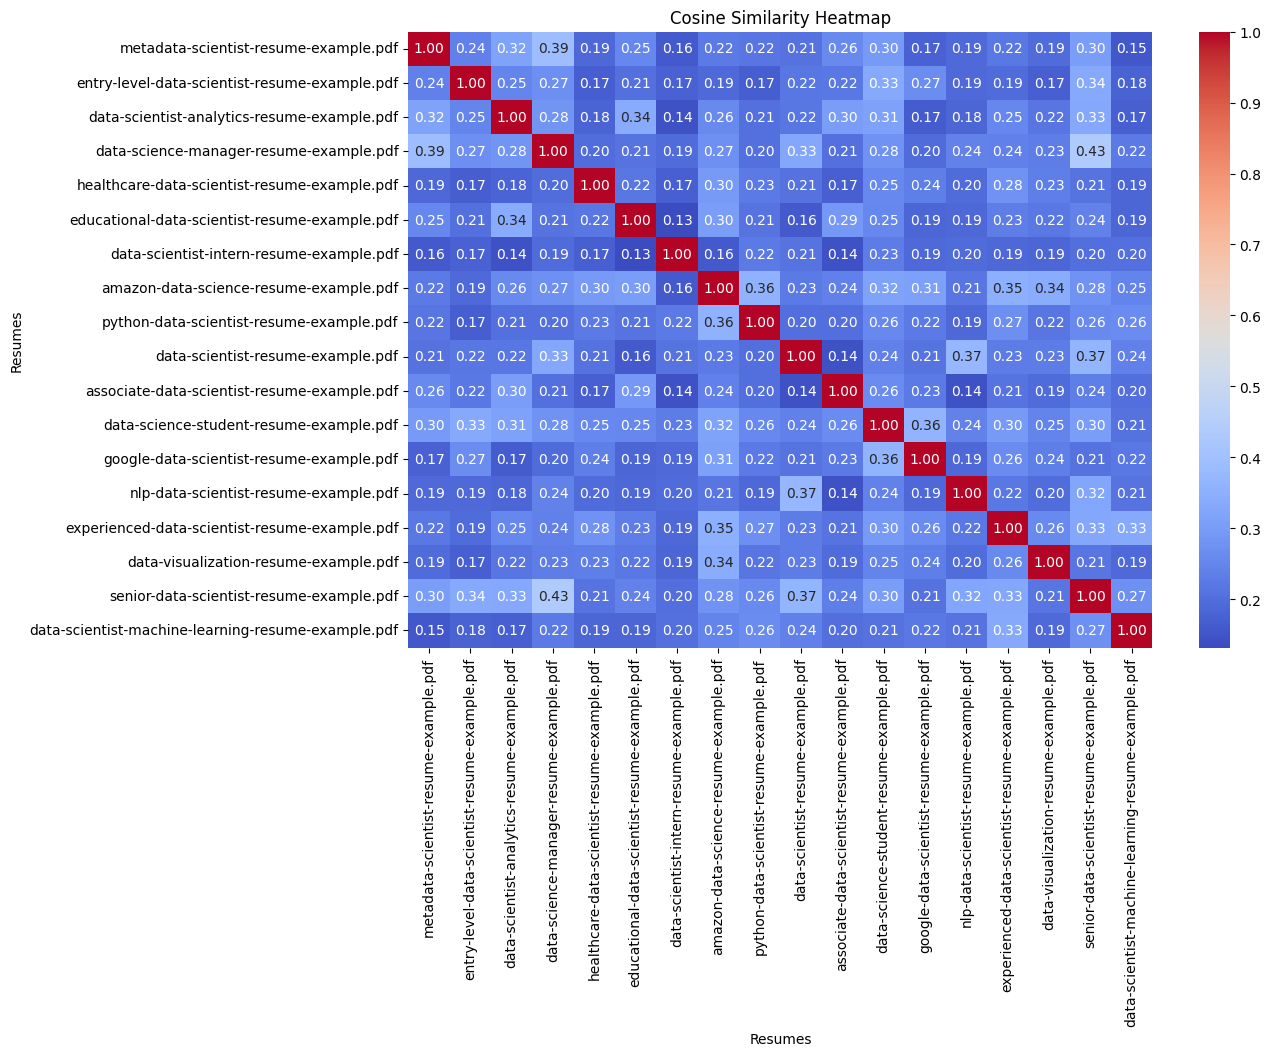

In [90]:
plot_similarity_heatmap(similarity_df)  # Execute the function to visualize the similarity heatmap

# <span style="color:blue;">Automated Resume Screening</span>

## Overview
Automated resume screening is the process of using machine learning and natural language processing (NLP) to evaluate resumes and match them with job descriptions. This automates the traditional manual screening process, saving time and ensuring consistency in the recruitment process.

## Purpose
- To identify the most relevant resumes based on predefined job criteria.
- Uses cosine similarity to compare resumes against job descriptions and ranks the resumes accordingly.

## Steps
1. **Data Collection**: Gather resumes and job descriptions as text data.
2. **Text Preprocessing**: Clean the text data by removing stop words, punctuation, and performing tokenization.
3. **Feature Extraction**: Convert the preprocessed text into numerical form using TF-IDF or other vectorization techniques.
4. **Cosine Similarity Matching**: Calculate the cosine similarity between each resume and the job description.
5. **Ranking Resumes**: Sort the resumes based on their similarity scores, with the highest similarity at the top.
6. **Thresholding**: Apply a threshold to filter out resumes that fall below a certain similarity score.

## Benefits
- **Efficiency**: Reduces the time needed to manually screen resumes.
- **Objectivity**: Avoids human bias and ensures consistent criteria for evaluation.
- **Scalability**: Can handle large volumes of resumes without performance degradation.

In [96]:
# Automated Resume Screening Function

In [97]:
def screen_resumes(resumes, job_description):
    # Combine resumes and job description for TF-IDF vectorization
    documents = list(resumes.values()) + [job_description]  # Include job description as the last document
    tfidf_vectorizer = TfidfVectorizer()  # Create TF-IDF vectorizer
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)  # Fit and transform the documents

    # Calculate cosine similarity between resumes and the job description
    cosine_similarities = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1])  # Exclude job description for similarities
    return cosine_similarities.flatten()  # Return flattened array of similarities

In [98]:
# Example job description

In [99]:
job_description = """
We are looking for a Data Scientist with experience in Python, machine learning, and data analysis.
The candidate should have strong analytical skills, be familiar with SQL, and have experience with
visualization tools like Matplotlib and Seaborn. Knowledge of big data technologies is a plus.
"""

In [100]:
similarities = screen_resumes(preprocessed_resumes, job_description)  # Execute the screening function

In [101]:
# Combine similarities with resume names for ranking

In [102]:
resume_scores = {name: similarity for name, similarity in zip(preprocessed_resumes.keys(), similarities)}  # Create a dictionary of scores


In [103]:
sorted_resumes = sorted(resume_scores.items(), key=lambda item: item[1], reverse=True)  # Sort resumes by similarity


In [104]:
# Display the ranked resumes

In [105]:
print("Ranked Resumes Based on Similarity to Job Description:")
for resume, score in sorted_resumes:
    print(f"{resume}: {score:.4f}")  # Print each resume with its corresponding similarity score

Ranked Resumes Based on Similarity to Job Description:
data-scientist-analytics-resume-example.pdf: 0.1793
metadata-scientist-resume-example.pdf: 0.1703
data-science-student-resume-example.pdf: 0.1653
senior-data-scientist-resume-example.pdf: 0.1594
associate-data-scientist-resume-example.pdf: 0.1564
amazon-data-science-resume-example.pdf: 0.1528
educational-data-scientist-resume-example.pdf: 0.1475
data-science-manager-resume-example.pdf: 0.1403
entry-level-data-scientist-resume-example.pdf: 0.1401
python-data-scientist-resume-example.pdf: 0.1392
experienced-data-scientist-resume-example.pdf: 0.1383
data-visualization-resume-example.pdf: 0.1292
data-scientist-machine-learning-resume-example.pdf: 0.1063
healthcare-data-scientist-resume-example.pdf: 0.1037
google-data-scientist-resume-example.pdf: 0.1021
data-scientist-resume-example.pdf: 0.0943
nlp-data-scientist-resume-example.pdf: 0.0905
data-scientist-intern-resume-example.pdf: 0.0727


# <span style="color:blue;">Deployment</span>

## Overview
Deployment is the final stage in the automated resume screening process, where the model is integrated into a production environment. It allows recruiters to use the system seamlessly to evaluate resumes as part of their recruitment workflow.

## Purpose
- To make the automated resume screening system available for real-time use.
- Ensures that the model can handle live data input (resumes) and provide meaningful outputs (ranked resumes).

## Deployment Options
1. **Web Application**: Deploy the system as a web app, where users can upload resumes and job descriptions for analysis. Tools like Flask or Django can be used to build the app.
2. **API Integration**: Develop a REST API that allows other systems to send resumes and job descriptions for evaluation. This API can then return the ranked list of resumes.
3. **Cloud Platforms**: Deploy the model on cloud services like AWS, Google Cloud, or Azure for scalability and accessibility.

## Steps
1. **Model Packaging**: Bundle the trained model and necessary dependencies into a deployable format (e.g., a `.pkl` file for Python-based models).
2. **Frontend/Backend Development**: Create a user interface (UI) where users can interact with the system. This includes file upload functionality for resumes and job descriptions.
3. **Testing in Production**: Conduct testing in the live environment to ensure that the system handles real-world data without issues.
4. **Monitoring and Maintenance**: Continuously monitor the system's performance and update the model as new resumes and job descriptions are processed.

## Benefits
- **Accessibility**: Recruiters can access the screening system from anywhere.
- **Automation**: The system automatically evaluates new resumes and job descriptions as they are uploaded.
- **Performance**: Ensures high throughput, handling large volumes of resumes without delay.

In [112]:
# Deploying with Flask model

In [92]:
app = Flask(__name__)  # Create a Flask app instance

In [93]:
@app.route('/similarity', methods=['POST'])  # Define the route for similarity endpoint
def get_similarity():  # Function to get similarity scores for a specified resume
    data = request.json  # Get JSON data from the request
    resume_name = data.get('resume_name')  # Extract the resume name from the JSON data
    if resume_name not in resumes:  # Check if the resume exists
        return jsonify({"error": "Resume not found"}), 404  # Return error if not found

    index = list(resumes.keys()).index(resume_name)  # Get the index of the specified resume
    similarity_scores = cosine_sim[index]  # Retrieve the similarity scores for the specified resume

    # Get the top 5 most similar resumes
    similar_indices = similarity_scores.argsort()[-6:-1][::-1]  # Get indices of the top 5 similar resumes
    similar_resumes = [(list(resumes.keys())[i], similarity_scores[i]) for i in similar_indices]  # Create a list of similar resumes and their scores

    return jsonify({"similar_resumes": similar_resumes})  # Return the similar resumes as a JSON response

In [94]:
if __name__ == '__main__':  # Check if the script is run directly
    app.run(debug=True)  # Run the Flask app in debug mode

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# <span style="color:blue;">Conclusion</span>

In this project, we have developed a comprehensive framework for analyzing resumes extracted from a RAR file. The key steps included:

- Importing necessary libraries for data manipulation, visualization, and web application development.
- Loading and inspecting resumes to understand their structure and content.
- Preprocessing the text for cleaner analysis.
- Conducting exploratory data analysis (EDA) to uncover insights about word counts, unique vocabulary, and keyword presence.
- Visualizing resume characteristics to gain further insights.

The framework can be extended with additional features and analyses based on specific project goals, making it a valuable tool for resume analysis and candidate assessment.